# Factors-Influecing-US-House-Price 

In [1]:
# import library for EDA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Collecting the data

In [2]:
#import the dataset
df=pd.read_csv('working_population.csv')
df["Year"] = pd.DatetimeIndex(df["observation_date"]).year
df["Month"] = pd.DatetimeIndex(df["observation_date"]).month
df.head()


,observation_date,working_population,Year,Month
0,01-01-2003,185635346.4,2003,1
1,01-02-2003,185869692.3,2003,1
2,01-03-2003,186085118.2,2003,1
3,01-04-2003,186470754.0,2003,1
4,01-05-2003,186649078.0,2003,1


In [3]:
df1 = pd.read_csv('Unemployment_Rate.csv')
df1.tail()

,observation_date,Unemployment_Rate
240,2023-01-01,3.4
241,2023-02-01,3.6
242,2023-03-01,3.5
243,2023-04-01,3.4
244,2023-05-01,3.7


In [4]:
# Convert the 'Date' column to datetime type
df1['observation_date'] = pd.to_datetime(df['observation_date'])
# Convert the 'Date' column to the 'dd-mm-yyyy' format
df1['Date_formatted'] = df1['observation_date'].dt.strftime('%m-%d-%Y')

In [5]:
df1

,observation_date,Unemployment_Rate,Date_formatted
0,2003-01-01,5.8,01-01-2003
1,2003-01-02,5.9,01-02-2003
2,2003-01-03,5.9,01-03-2003
3,2003-01-04,6.0,01-04-2003
4,2003-01-05,6.1,01-05-2003
...,...,...,...
240,2023-01-01,3.4,01-01-2023
241,2023-01-02,3.6,01-02-2023
242,2023-01-03,3.5,01-03-2023
243,2023-01-04,3.4,01-04-2023


In [6]:
df1=df1.drop(['observation_date'],axis=1)

In [7]:
df1

,Unemployment_Rate,Date_formatted
0,5.8,01-01-2003
1,5.9,01-02-2003
2,5.9,01-03-2003
3,6.0,01-04-2003
4,6.1,01-05-2003
...,...,...
240,3.4,01-01-2023
241,3.6,01-02-2023
242,3.5,01-03-2023
243,3.4,01-04-2023


In [8]:
df1 = df1.rename(columns={'Date_formatted': 'observation_date'})
df1

,Unemployment_Rate,observation_date
0,5.8,01-01-2003
1,5.9,01-02-2003
2,5.9,01-03-2003
3,6.0,01-04-2003
4,6.1,01-05-2003
...,...,...
240,3.4,01-01-2023
241,3.6,01-02-2023
242,3.5,01-03-2023
243,3.4,01-04-2023


In [9]:
df3 = pd.read_csv('producer_price_index.csv')
df3.head()

,observation_date,producer_price_index
0,01-01-1973,44.1
1,01-02-1973,44.4
2,01-03-1973,44.6
3,01-04-1973,44.6
4,01-05-1973,44.7


In [10]:
df4 = pd.read_csv('cpi.csv')
df4.head()

,observation_date,cpi
0,01-01-2003,2.787553
1,01-02-2003,2.704659
2,01-03-2003,2.627787
3,01-04-2003,2.459349
4,01-05-2003,2.348341


In [11]:
df5 = pd.read_csv('discount_interest_rates.csv')
df5.head()

,observation_date,discount_interest_rates
0,01-01-2003,2.25
1,01-02-2003,2.25
2,01-03-2003,2.25
3,01-04-2003,2.25
4,01-05-2003,2.25


In [12]:
df6 = pd.read_csv('monthly_supply_houses.csv')
df6.head()

,observation_date,monthly_supply_houses
0,01-01-2003,4.0
1,01-02-2003,4.5
2,01-03-2003,4.1
3,01-04-2003,4.1
4,01-05-2003,3.9


In [13]:
df8 = pd.read_csv('price.csv')
df8.head()

,observation_date,price
0,2003-01-01,128.461
1,2003-02-01,129.355
2,2003-03-01,130.148
3,2003-04-01,130.884
4,2003-05-01,131.735


In [14]:
# Convert the 'Date' column to datetime type
df8['observation_date'] = pd.to_datetime(df['observation_date'])
# Convert the 'Date' column to the 'dd-mm-yyyy' format
df8['Date_formatted'] = df8['observation_date'].dt.strftime('%m-%d-%Y')

In [15]:
df8=df8.drop(['observation_date'],axis=1)

In [16]:
df8 = df8.rename(columns={'Date_formatted': 'observation_date'})
df8

,price,observation_date
0,128.461,01-01-2003
1,129.355,01-02-2003
2,130.148,01-03-2003
3,130.884,01-04-2003
4,131.735,01-05-2003
...,...,...
240,297.030,01-01-2023
241,297.537,01-02-2023
242,298.637,01-03-2023
243,300.213,01-04-2023


In [18]:
# Merge df1 and df2
merged_df = pd.merge(df1, df3, on='observation_date')

# Continue merging with df3, df4, df5, df6, df8
#merged_df = pd.merge(merged_df, df3, on='observation_date', how='inner')
merged_df = pd.merge(merged_df, df4, on='observation_date')
merged_df = pd.merge(merged_df, df5, on='observation_date')
merged_df = pd.merge(merged_df, df6, on='observation_date')
merged_df["Year"] = pd.DatetimeIndex(merged_df["observation_date"]).year
merged_df["Month"] = pd.DatetimeIndex(merged_df["observation_date"]).month
merged_df = pd.merge(merged_df, df8, on='observation_date')


# Display the result
merged_df


,Unemployment_Rate,observation_date,producer_price_index,cpi,discount_interest_rates,monthly_supply_houses,Year,Month,price
0,5.8,01-01-2003,174.600,2.787553,2.25,4.0,2003,1,128.461
1,5.9,01-02-2003,175.200,2.704659,2.25,4.5,2003,1,129.355
2,5.9,01-03-2003,175.500,2.627787,2.25,4.1,2003,1,130.148
3,6.0,01-04-2003,175.800,2.459349,2.25,4.1,2003,1,130.884
4,6.1,01-05-2003,176.300,2.348341,2.25,3.9,2003,1,131.735
...,...,...,...,...,...,...,...,...,...
219,6.1,01-04-2021,373.500,2.262331,0.25,4.7,2021,1,249.070
220,5.8,01-05-2021,376.900,2.623164,0.25,5.6,2021,1,253.407
221,5.9,01-06-2021,378.200,2.588579,0.25,5.8,2021,1,258.358
222,5.4,01-07-2021,379.467,2.315464,0.25,5.7,2021,1,262.820


# Pre-Processing

In [19]:
merged_df.isnull().sum()

Unemployment_Rate          0
observation_date           0
producer_price_index       0
cpi                        0
discount_interest_rates    0
monthly_supply_houses      0
Year                       0
Month                      0
price                      0
dtype: int64

In [20]:
merged_df.shape

(224, 9)

In [21]:
#  check  the duplicate again
duplicate = merged_df[merged_df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Unemployment_Rate,observation_date,producer_price_index,cpi,discount_interest_rates,monthly_supply_houses,Year,Month,price


In [22]:
merged_df.describe()

,Unemployment_Rate,producer_price_index,cpi,discount_interest_rates,monthly_supply_houses,Year,Month,price
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.0,224.000000
mean,6.168750,273.914286,2.214946,1.946429,6.014732,2011.839286,1.0,172.648402
std,2.013677,56.618004,0.523737,1.732351,1.918077,5.403127,0.0,29.134351
min,3.500000,174.600000,0.667614,0.250000,3.300000,2003.000000,1.0,128.461000
25%,4.700000,234.650000,2.005605,0.750000,4.700000,2007.000000,1.0,147.909250
50%,5.600000,272.000000,2.259707,1.000000,5.500000,2012.000000,1.0,169.575500
75%,7.625000,316.175000,2.539549,2.500000,6.750000,2016.250000,1.0,185.992750
max,14.700000,380.833000,3.291125,6.250000,12.200000,2021.000000,1.0,266.845000


# EDA

********************
2003    12
2013    12
2020    12
2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2012    12
2004    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2021     8
Name: Year, dtype: int64
********************


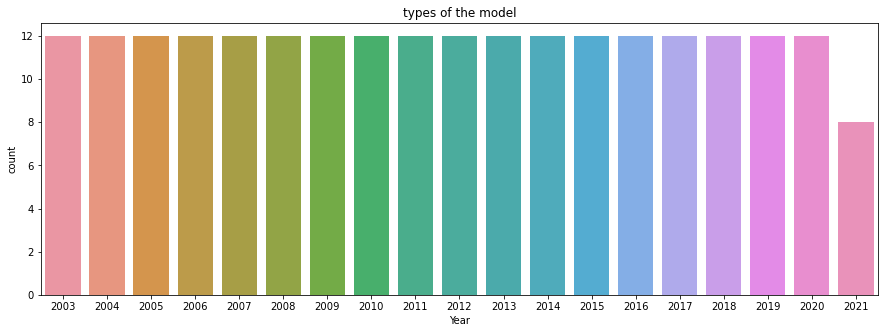

In [23]:
# Seeing which car sold most
plt.figure(figsize=(15,5))
sns.countplot(x='Year' , data=merged_df)
plt.title('types of the model')
print('*'*20)
print(merged_df.Year.value_counts())
print('*'*20)
plt.show()

## From above bar chart we can observe in our data set we have data from year january 2003 to August 2021

Text(0.5, 1.0, 'price vs year')

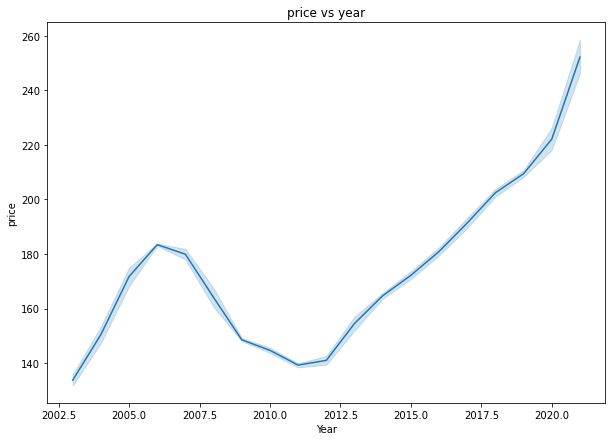

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year' , y='price' , data=merged_df)
plt.title('price vs year')

## From above line chart we observe price of house was rising till 2007 after that we see sudden downfall in price till 2013 year after that price is continous rising.

In [25]:
merged_df.columns

Index(['Unemployment_Rate', 'observation_date', 'producer_price_index', 'cpi',
       'discount_interest_rates', 'monthly_supply_houses', 'Year', 'Month',
       'price'],
      dtype='object')

Text(0.5, 1.0, 'Unemployment_Rate vs year')

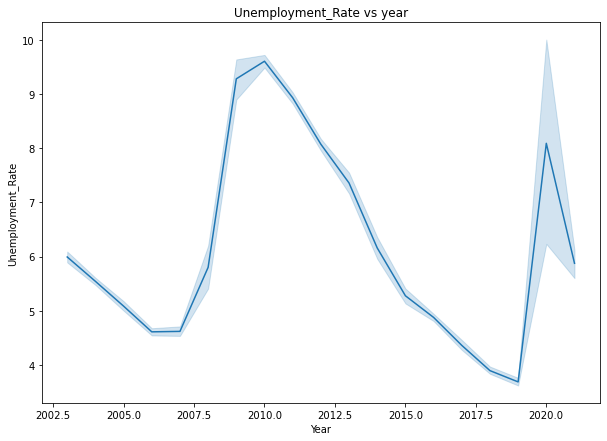

In [26]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year' , y='Unemployment_Rate' , data=merged_df)
plt.title('Unemployment_Rate vs year')

## The unemployment rate was low till 2007 and there is sudden increase in unemployment rate in year 2008 to 2011 then it is lowering till 2018 and sudden increase after year 2018.

Text(0.5, 1.0, 'producer_price_index vs cpi')

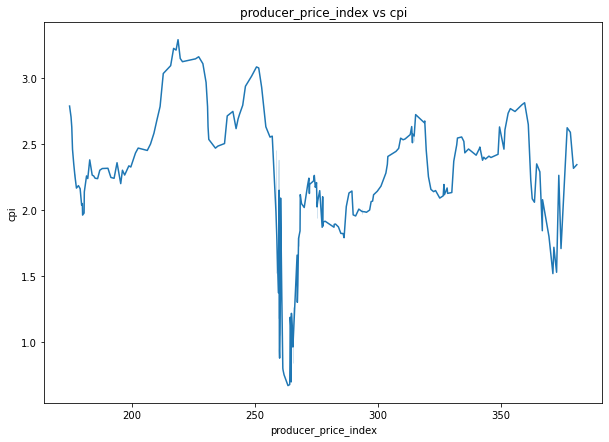

In [27]:
plt.figure(figsize=(10,7))
sns.lineplot(x='producer_price_index' , y='cpi' , data=merged_df)
plt.title('producer_price_index vs cpi')

## The graph shows that the PPI and CPI generally trend together, but there are some periods where they diverge. from 2008 to 2010, the PPI fell sharply, while the CPI remained relatively flat. This is because the PPI is more volatile than the CPI, as it is more sensitive to changes in input costs and demand.

In [28]:
merged_df.columns

Index(['Unemployment_Rate', 'observation_date', 'producer_price_index', 'cpi',
       'discount_interest_rates', 'monthly_supply_houses', 'Year', 'Month',
       'price'],
      dtype='object')

Text(0.5, 1.0, 'discount_interest_rates vs Year')

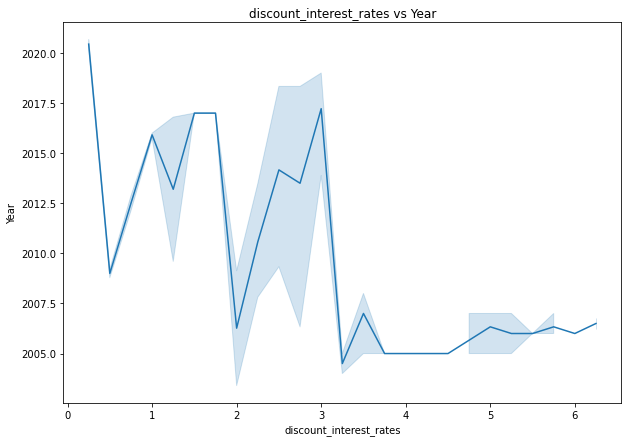

In [29]:
plt.figure(figsize=(10,7))
sns.lineplot(x='discount_interest_rates' , y='Year' , data=merged_df)
plt.title('discount_interest_rates vs Year')


## The graph shows that the discount rate has been relatively stable over the past 10 years, averaging around 5%. However, there have been some periods of volatility. For example, the discount rate spiked to 7% in 2008 during the financial crisis. It then fell to 0% in 2009 and 2010 as the Fed tried to stimulate the economy. The discount rate has since risen to 4.25% as of December 2023

# Plotting the heatmap to observe Co-relation

In [30]:
corr=merged_df.corr()
corr.shape

(8, 8)

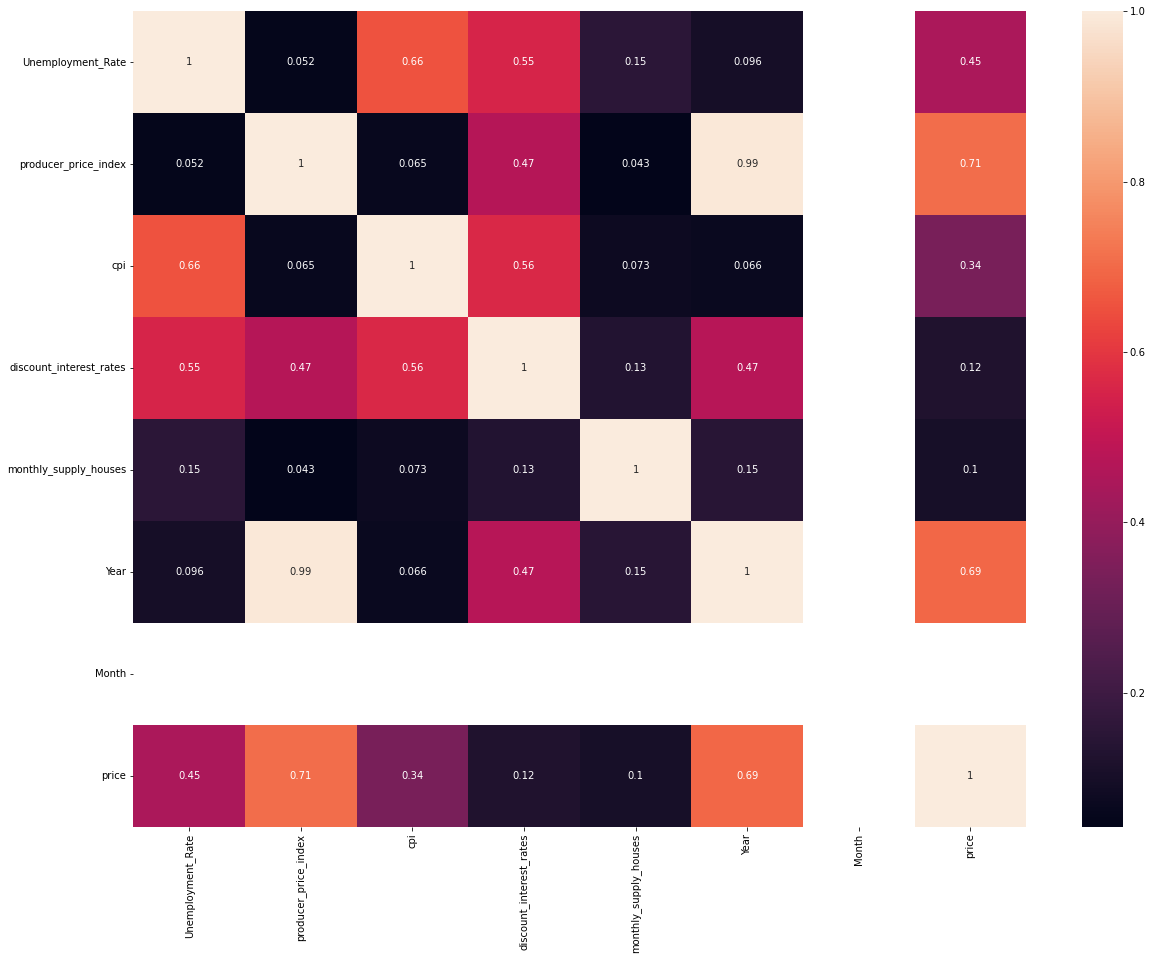

In [31]:
corr=merged_df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

## In above Correlation plot we observe the is could me multi-colinearity exist as the 2 feature which are producer_price_index and year are highly co-related around 99%

In [32]:
merged_df.columns


Index(['Unemployment_Rate', 'observation_date', 'producer_price_index', 'cpi',
       'discount_interest_rates', 'monthly_supply_houses', 'Year', 'Month',
       'price'],
      dtype='object')

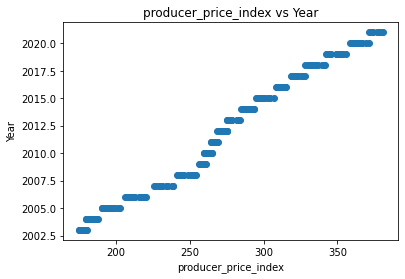

In [33]:
plt.scatter(merged_df['producer_price_index'],merged_df['Year'])
plt.xlabel('producer_price_index')
plt.ylabel('Year')
plt.title('producer_price_index vs Year')
plt.show()

# So from the above scatter plot we observe there is a trend and we are going to drop one column that contributes less to the label.

# Plotting Histogram plot to see how data is distributed on an interval scale.

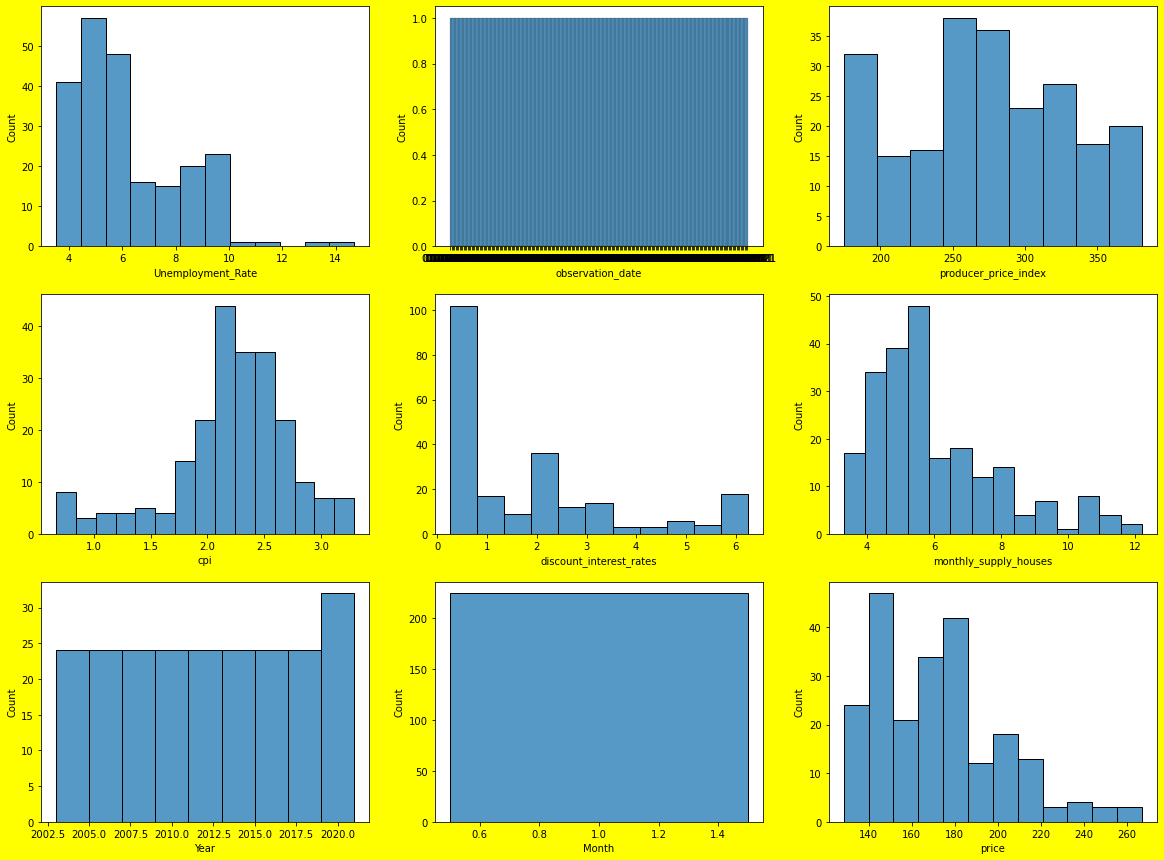

In [34]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in merged_df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot (merged_df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

In [35]:
merged_df = merged_df.drop(['observation_date'], axis = 1)

# Plotting Distribution plot to see how data is distributed

C:\Users\Dipesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dipesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dipesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

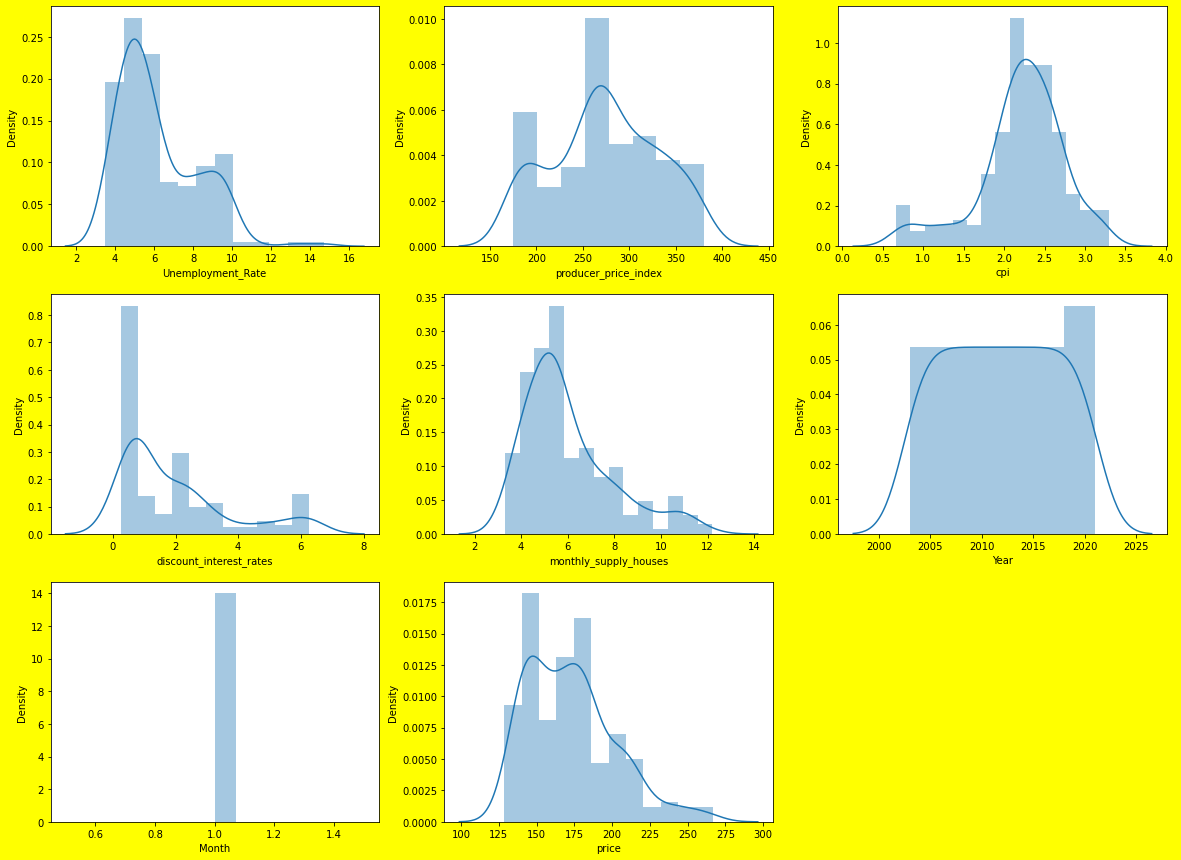

In [36]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in merged_df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot (merged_df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From above distribution graph we observe there is skewness in the data

## Seperating Feature and Label

In [37]:
X = merged_df.drop(['price'],axis = 1)
y = merged_df['price']

# Plotting Scatter plot to see realtion between feature and label

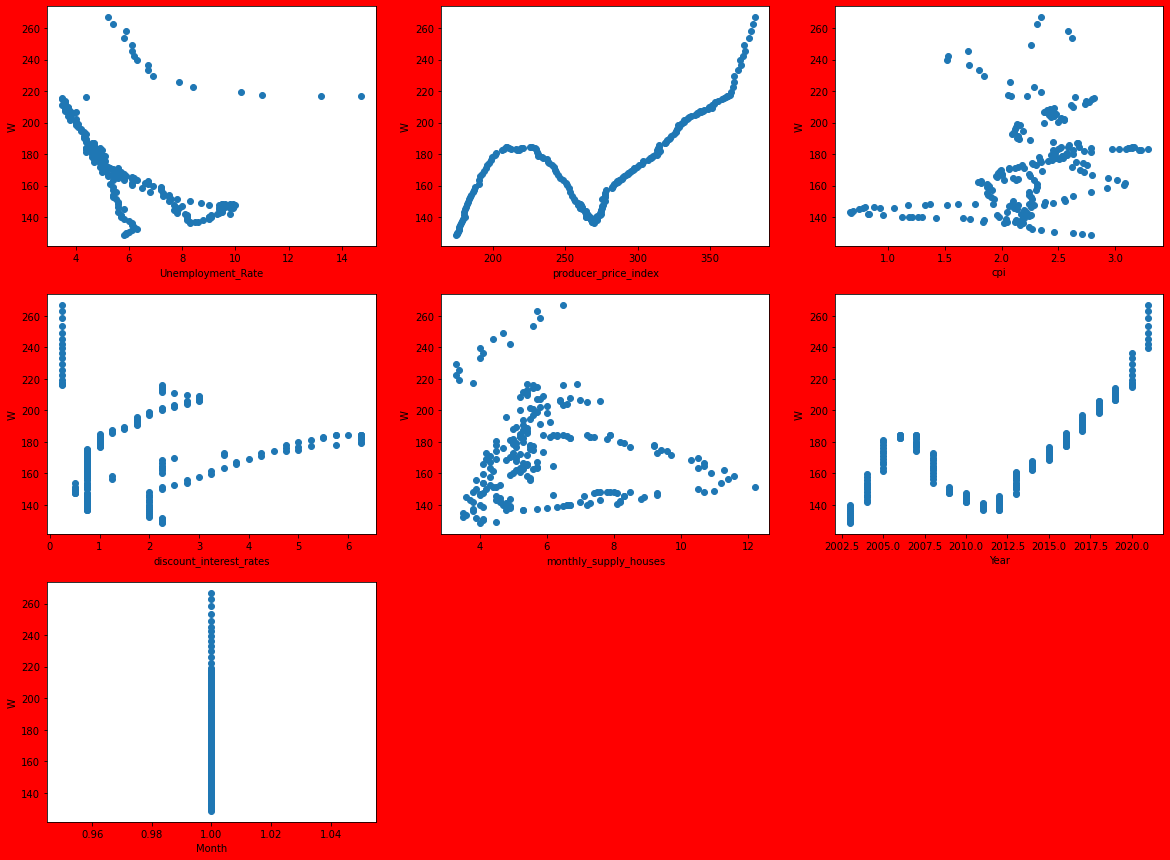

In [38]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

# Plotting Regression plot to see realtion between feature and label

C:\Users\Dipesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dipesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dipesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dipesh\ana

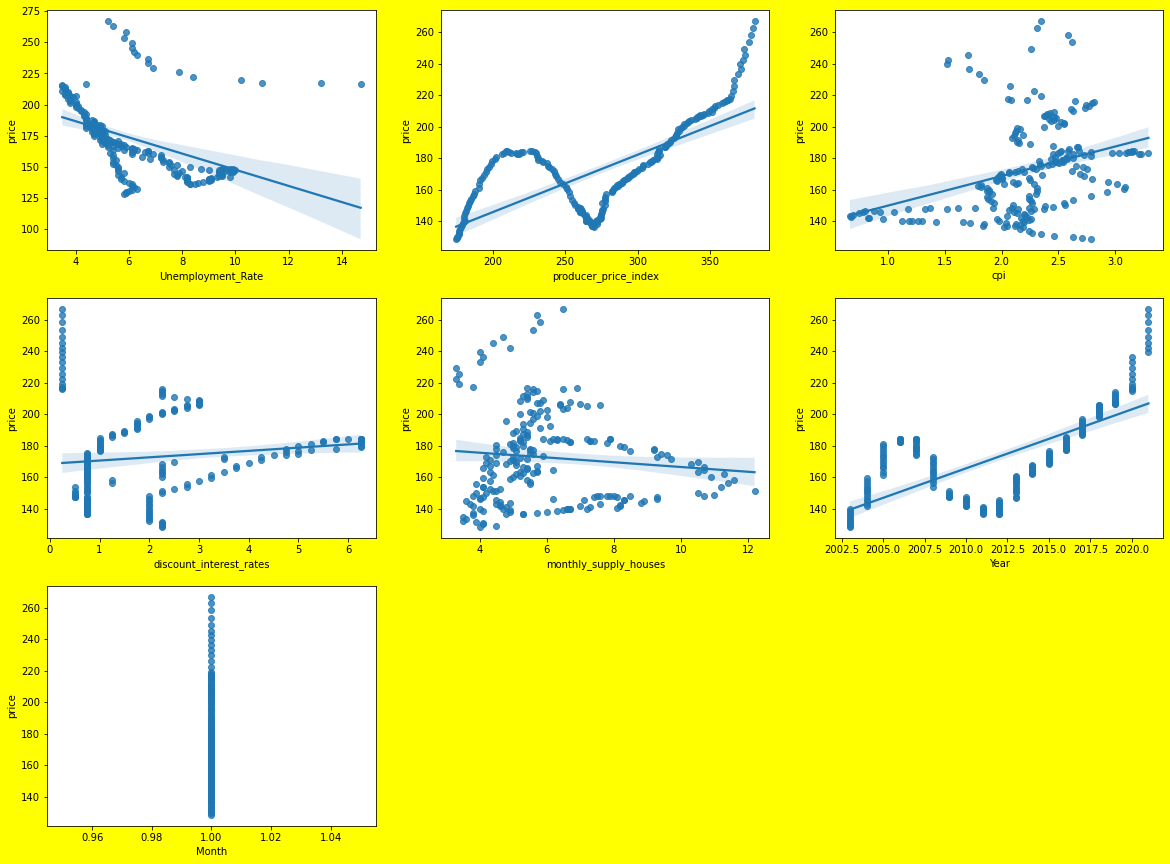

In [39]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From above graph we observe there is positve co-relation between ppi,cpi,year discount intrest rate WRT Price

## Scaling the data

In [42]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## Checking for the multicollinearity Using VIF 

In [43]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

C:\Users\Dipesh\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,features
0,3.027612,Unemployment_Rate
1,135.818422,producer_price_index
2,2.068819,cpi
3,2.783697,discount_interest_rates
4,2.328039,monthly_supply_houses
5,143.586722,Year
6,NaN,Month


## Dropping Year and month as there is VIF exist

In [44]:
X=X.drop(['Year','Month'],axis=1)

In [45]:
X

,Unemployment_Rate,producer_price_index,cpi,discount_interest_rates,monthly_supply_houses
0,5.8,174.600,2.787553,2.25,4.0
1,5.9,175.200,2.704659,2.25,4.5
2,5.9,175.500,2.627787,2.25,4.1
3,6.0,175.800,2.459349,2.25,4.1
4,6.1,176.300,2.348341,2.25,3.9
...,...,...,...,...,...
219,6.1,373.500,2.262331,0.25,4.7
220,5.8,376.900,2.623164,0.25,5.6
221,5.9,378.200,2.588579,0.25,5.8
222,5.4,379.467,2.315464,0.25,5.7


In [46]:
y

0      128.461
1      129.355
2      130.148
3      130.884
4      131.735
        ...   
219    249.070
220    253.407
221    258.358
222    262.820
223    266.845
Name: price, Length: 224, dtype: float64

## Finding correlation between feature n lable using CORR method¶

In [47]:
#  (code type      --   feature corrwith label)

merged_df.drop('price' , axis =1 ).corrwith (merged_df.price)

Unemployment_Rate         -0.448526
producer_price_index       0.707042
cpi                        0.337471
discount_interest_rates    0.121913
monthly_supply_houses     -0.099524
Year                       0.694197
Month                           NaN
dtype: float64

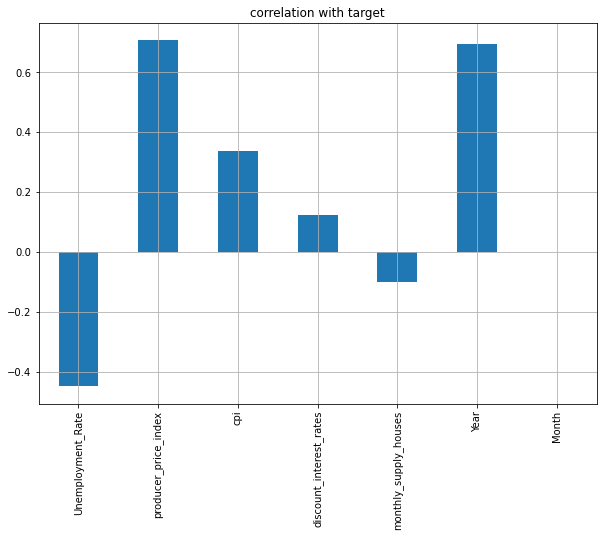

In [48]:
# convert above numbers into graph for better understanding
merged_df.drop('price' , axis = 1).corrwith (merged_df.price).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

# GradientBoostingRegressor Model

In [49]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


In [50]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,50):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 99.95683458255515 RandomState 0
Testing Score 99.54653855045706 RandomState 0


MAXINING TESTING SCORE 99.54653855045706 ON RANDOM STATE OF 0
Training Score 99.96760488911083 RandomState 1
Testing Score 99.09102317808617 RandomState 1


Training Score 99.95143237240815 RandomState 2
Testing Score 99.21532239617365 RandomState 2


Training Score 99.95479105890365 RandomState 3
Testing Score 99.09545080307171 RandomState 3


Training Score 99.93469434452658 RandomState 4
Testing Score 99.5930372117399 RandomState 4


MAXINING TESTING SCORE 99.5930372117399 ON RANDOM STATE OF 4
Training Score 99.96200286088546 RandomState 5
Testing Score 99.09174802406582 RandomState 5


Training Score 99.96786188058515 RandomState 6
Testing Score 99.31945501375725 RandomState 6


Training Score 99.95147763614628 RandomState 7
Testing Score 99.34406310256745 RandomState 7


Training Score 99.95134860306742 RandomState 8
Testing Score 98.67199380669722 RandomState 8


Training Score 99.94598

In [51]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 99.6836632607937 ON RANDOM STATE OF 15


In [52]:
#splliting our data into train test split and randomstate 15
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=15)

In [53]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [54]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [55]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.999618104129529


In [56]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [57]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9957555945297785


# Model Score

    Training Score = 99.18104129529 %
    Testing Score = 99.555945297785 %

# Hyperparameter tuning for GradientBoostingRegressor

In [58]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [59]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [60]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [61]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [62]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 3,
 'n_estimators': 110}

In [63]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 5,
 min_samples_split= 2,
 n_estimators= 100)

In [64]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5)

In [65]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [66]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9999843583023572


In [67]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [68]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9962197908438348


# Model Score after Hyperparameter Tuning

    Training Score = 99.99843583023572 %
    Testing Score = 99.62197908438348 %

# RandomForestRegressor Model

In [73]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [74]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,50):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 99.93464237465807 RandomState 0
Testing Score 99.69957490027124 RandomState 0


MAXINING TESTING SCORE 99.69957490027124 ON RANDOM STATE OF 0
Training Score 99.90688287468605 RandomState 1
Testing Score 99.20592843751491 RandomState 1


Training Score 99.91043545430381 RandomState 2
Testing Score 99.46831601196124 RandomState 2


Training Score 99.9277152805455 RandomState 3
Testing Score 99.55818895600717 RandomState 3


Training Score 99.88293084766349 RandomState 4
Testing Score 99.61302321645023 RandomState 4


Training Score 99.89497861453802 RandomState 5
Testing Score 99.0562463277928 RandomState 5


Training Score 99.93764937321355 RandomState 6
Testing Score 99.47213306384603 RandomState 6


Training Score 99.92665442307924 RandomState 7
Testing Score 99.59211810708918 RandomState 7


Training Score 99.91614127847801 RandomState 8
Testing Score 98.38637972156907 RandomState 8


Training Score 99.90781106631265 RandomState 9
Testing Score 99.60550719685767 Random

In [75]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 99.81262568396242 ON RANDOM STATE OF 31


In [77]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=31)

In [78]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [80]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9990825909035758


In [81]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [82]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9981606949943461


# Model Score
    Training Score = 99.90825909035758 %
    Testing Score = 99.81606949943461 %

# Hyperparameter tuning for Random Forest

In [83]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [84]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [85]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [86]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1}


In [87]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 1)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, max_features='auto',
                      min_samples_split=1)

In [88]:
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  99.92222763585391


In [89]:
pred_decision=rf.predict(X_test)
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)

In [90]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 99.80138126602715


# Model Score after Hyperparameter Tuning

    Training Score = 99.92222763585391 %
    Testing Score = 99.80138126602715 %

# Linear Regression Model

In [92]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [93]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,50):
    X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 83.97321086078541 RandomState 0
Testing Score 75.71877100031853 RandomState 0


MAXINING TESTING SCORE 75.71877100031853 ON RANDOM STATE OF 0
Training Score 83.07132289041279 RandomState 1
Testing Score 80.36174495755411 RandomState 1


MAXINING TESTING SCORE 80.36174495755411 ON RANDOM STATE OF 1
Training Score 83.03218870325834 RandomState 2
Testing Score 77.24821329000164 RandomState 2


Training Score 82.60952263126987 RandomState 3
Testing Score 81.84552310805834 RandomState 3


MAXINING TESTING SCORE 81.84552310805834 ON RANDOM STATE OF 3
Training Score 83.47924577874718 RandomState 4
Testing Score 79.69633867006456 RandomState 4


Training Score 82.62642586971658 RandomState 5
Testing Score 82.15708308399948 RandomState 5


MAXINING TESTING SCORE 82.15708308399948 ON RANDOM STATE OF 5
Training Score 82.59723170643227 RandomState 6
Testing Score 81.49319345923448 RandomState 6


Training Score 84.3520576086648 RandomState 7
Testing Score 76.05316759618914 RandomSta

In [94]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 86.80330208151332 ON RANDOM STATE OF 28


In [95]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=28)

In [96]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [97]:
#training score
regression.score(X_train,y_train)  

0.8139160412886894

In [98]:
#testing score
regression.score(X_test,y_test) 

0.8680330208151332

# Model Score

    Training Score = 81.39160412886894 %
    Testing Score = 86.80330208151332 %

In [99]:
y_pred=regression.predict(X_test)
y_pred

array([131.18757762, 209.61224337, 157.06271896, 161.56372456,
       167.41105508, 170.8742995 , 195.34674296, 156.54893078,
       205.21394299, 213.31839353, 201.34683166, 149.04664498,
       222.12893916, 154.57247327, 213.99513528, 154.18298271,
       160.28458806, 187.51890937, 164.41610167, 160.00692988,
       173.35160752, 190.20863945, 142.31709903, 224.71095508,
       170.17563272, 141.8707324 , 160.5689736 , 166.20387886,
       159.80211202, 211.55979351, 143.42555494, 211.36010911,
       217.16523581, 202.5583409 , 223.04444068, 186.1047699 ,
       195.89631288, 138.67325388, 153.04267044, 146.93965075,
       158.55739974, 135.56309733, 179.31453983, 226.5730558 ,
       179.0303773 , 170.1818171 , 141.18923077, 202.92092247,
       151.57293183, 193.97781029, 156.47213289, 144.76274605,
       189.69299344, 207.97557769, 156.41964275, 167.13453449])

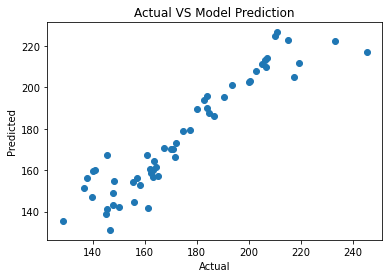

In [100]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Model Prediction')
plt.show()

# Checking MAE , MSE & RMSE scores

In [101]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [102]:
# again predict 
y_pred = regression.predict(X_test)

In [103]:
#MAE
mean_absolute_error(y_test,y_pred)

7.628310750439089

In [104]:
#MSE
mean_squared_error(y_test,y_pred)

96.51770440895977

In [105]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

9.824342441556064

# Scores

    MAE SCORE = 7.628310750439089
    MSE SCORE = 96.51770440895977
    RMSE SCORE = 9.824342441556064

# LASSO MODEL

In [106]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [110]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100)

In [111]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.02134319159772564

In [112]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.02134319159772564)

In [113]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.8665872381347492

# RIDGE MODEL

In [115]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [116]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [117]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [118]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.8651601918943913

# SCORES

    LASSO SCORES = 86.65872381347492 %
    RIDGE SCORES = 86.51601918943913 %

# So from above model we made we select Random Forest Regressor for this particular problem as it has high score as come to other models.

# Saving the Best model

In [122]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(rf , open ('reg_model' , 'wb'))